# Datacleaning
1. Importera data från datakälla, antingen från en källa eller från olika datakällor och slår ihop dom.
2. Filtrerar data på olika sätt. T.ex. query för att få ut enbart "volvo" bilar etc. Få fram enbart den data man är intresserad av.
3. Cleaning: Hitta dubletter, hantera avsaknad av data, hantera felaktiga datatyper, ologiska värden.
"Resultat i ML aldrig bättre än datat man skickar in", "Garbage in, garbage out"

I många fall behöver man hitta data själv från olika källor. Dessa kan skilja sig ifrån varandra på olika sätt, ha dubletter och liknande. 
Viktigt arbete att få till högkvalitativt data.


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns


### Missing data
Missing data occurs when values are simply absent or containt NaN (not a number) for any feature(column)(interchangeable in pandas also such as row/index) in a given dataset. This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization 
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute with mean or median (t.ex. ålder saknas så fyller man i med medel eller medianvärde för resterande åldrar). Done mostly with numerics
- Impute with mode (most frequently occuring feature). Done mostly with categorical data. 
- Impute with forward or backward fill (fyller luckan med det senast ifyllda, antingen uppifrån eller nenidfrån)
- Interpolate data between two points. T.ex. värden:
4,6,8,4,-,-,12, så sprider man ut det jämnt emellan 4 och 12.

*Note: Domain knowledge is often needed to decide how to fill nulls.
The method is chosen depending on how the data is to be interpreted. Often some expert on the data is asked, not always we decide. E.g. data on MRI scans, we have to ask some expert on how to decide and then techniqally handle nulls according to this.



In [36]:
df = pd.DataFrame(np.random.randn(10,4), columns = ["A", "B", "C", "D"])

df

,A,B,C,D
0,2.490868,-2.080192,-0.790204,-0.654905
1,1.042532,1.421082,1.068051,-0.349381
2,-0.771565,-0.691942,-0.994162,0.228135
3,0.330043,-1.131900,-0.840531,1.399486
4,-1.713335,1.205717,-0.255623,-1.285544
5,1.305558,-0.273279,0.161432,-0.050859
6,0.699325,-1.110475,0.547667,1.566926
7,-0.663785,1.700101,-0.963150,-0.900406
8,-0.422652,2.129242,-0.253097,-0.784877
9,0.613739,0.298164,-0.393649,2.812765


In [37]:
copy = df.copy()
copy.drop(columns = "D", inplace = True) 
# Returnerar denna men uppdaterar inte copy, sätter inplace för att spara
# Kolla upp denna del och det han sade
copy

,A,B,C
0,2.490868,-2.080192,-0.790204
1,1.042532,1.421082,1.068051
2,-0.771565,-0.691942,-0.994162
3,0.330043,-1.131900,-0.840531
4,-1.713335,1.205717,-0.255623
5,1.305558,-0.273279,0.161432
6,0.699325,-1.110475,0.547667
7,-0.663785,1.700101,-0.963150
8,-0.422652,2.129242,-0.253097
9,0.613739,0.298164,-0.393649


## dropna
Remove rows (default), or columns, containing null.

**Parameters**
- **how** = "any" (default) or "all"
-**thresh** = set number of (non-missing) values a row must contain in order to *not* drop
-**subset** only look for Nan in subset of columns (or rows)
-**axis** = "index" (default) or "columns"

In [38]:
copy.isna() # saknade värden blir True i Dataframen


,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [39]:
copy.dropna()    # Kollar på rader per default och tar bort alla rader som innehåller en NaN
copy.dropna(how="all")  #How = "all" tar bort rader då alla värden är non. Default är any, då tas de bort även om enbart ett värde är NaN på raden
copy.dropna(thresh = 3)    # bestämmer hur många värden som måste finnas för att de ska vara kvar - så tre kolumner med tre värden.
copy.dropna(subset = "C") # Droppar enbart rader som har NaN i C
copy.dropna(subset = ["A", "C"])  # Droppar i flera kolumner via lista
copy.dropna(axis = "columns", subset = 2) # Ta bort alla kolumner =????


,A,B,C
0,2.490868,-2.080192,-0.790204
1,1.042532,1.421082,1.068051
2,-0.771565,-0.691942,-0.994162
3,0.330043,-1.131900,-0.840531
4,-1.713335,1.205717,-0.255623
5,1.305558,-0.273279,0.161432
6,0.699325,-1.110475,0.547667
7,-0.663785,1.700101,-0.963150
8,-0.422652,2.129242,-0.253097
9,0.613739,0.298164,-0.393649


### Fillna
Fill missing values
- Fylla i värden istället för att ta bort NaN  
- Andra timmen 2023-10-27


In [40]:
copy = df.copy()
copy.fillna(0)  
# Inom parentes skriver man vad som ska fyllas i
# Vanligast är någon av stragierna som stod längst upp - typ mean, median osv

# copy.fillna(44544)      # fyller i alla kolumner
copy["A"].mean()  # Mean för allt i kolumn A
copy["A"].fillna(copy["A"].mean(), inplace =True)  # Här fyller man NaN värden i kolumn A med mean. Med inplace = TRue uppdateras själva copy också, annars körs bara

# copy["B"].mode()[0]   # Mainly for categorical data 

copy["B"].ffill(inplace = True)     # Forward fill, fyller NaN framåt med senaste värdet uppifrån ned
copy["D"].bfill(inplace = True)    # Som forward fill fast nedifrån upp

copy["C"].interpolate(inplace = True)          #Interpolate - fyller med NaN med jämna värden mittemellan innan och efter värden
copy
# Ofta vill man fylla internt i kolumner, alltså inte ta metod i alla kolumners värden




,A,B,C,D
0,2.490868,-2.080192,-0.790204,-0.654905
1,1.042532,1.421082,1.068051,-0.349381
2,-0.771565,-0.691942,-0.994162,0.228135
3,0.330043,-1.131900,-0.840531,1.399486
4,-1.713335,1.205717,-0.255623,-1.285544
5,1.305558,-0.273279,0.161432,-0.050859
6,0.699325,-1.110475,0.547667,1.566926
7,-0.663785,1.700101,-0.963150,-0.900406
8,-0.422652,2.129242,-0.253097,-0.784877
9,0.613739,0.298164,-0.393649,2.812765


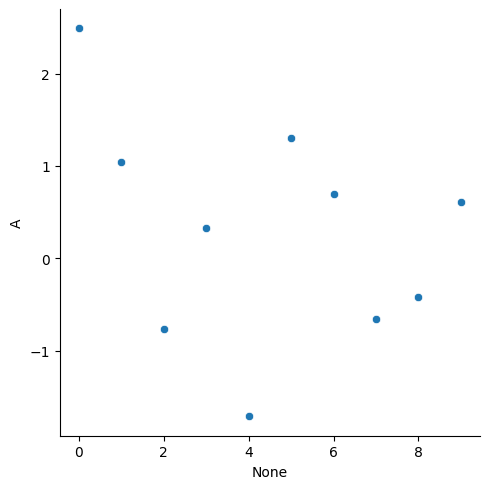

In [42]:
copy = df.copy()
copy
sns.relplot(x=copy.index, y="A", data = copy)

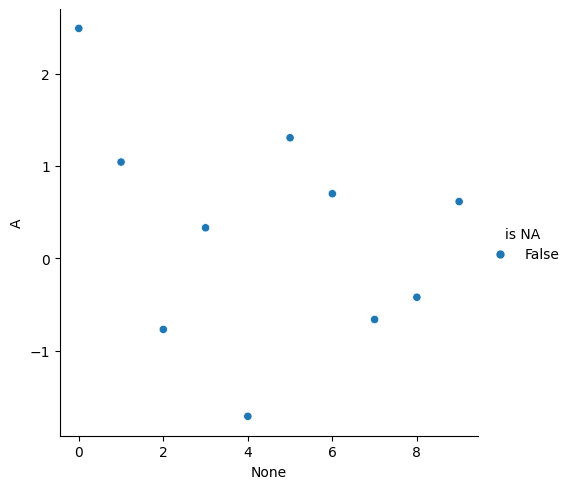

In [45]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()   # Får false på de rader i kolumn A som inte har NaN och true på de andra
copy["A"].interpolate()    # Här ser du hur den fyller emellan värden i grafen
copy["A"].ffill()    # se i grafen hur den fyller samma
copy["A"].bfill()    # se i grafen hur den fyller samma
sns.relplot(x=copy.index, y="A", hue = "is NA", data = copy)



Alltså i princip 2 metoder i Pandas dropna för att ta bort kolumner/rader med NaN eller fillna för att fylla i på olika sätt.